# Numerical Analysis

Nutpy allows to perform the visibility analysis numerically. To do so, nutpy propagates the attitude of the satellite for the choosen time period $T_{sim}$ with a fixed time step $dT$. Then the sky is discretized using HEALPix algorithm (see figure below), which provides a fairly regular grid. This discretization allows to compute the quantities (TAT, MAT, and MAX) for each of the elements of the grid.

Having the attitude of the satellite (and therefore, the orientation of the instrument) and the discretization of the sky, nutpy will detect which elements of the grid are inside the intrument FOV in each timestep and then process this information to compute the quantities.

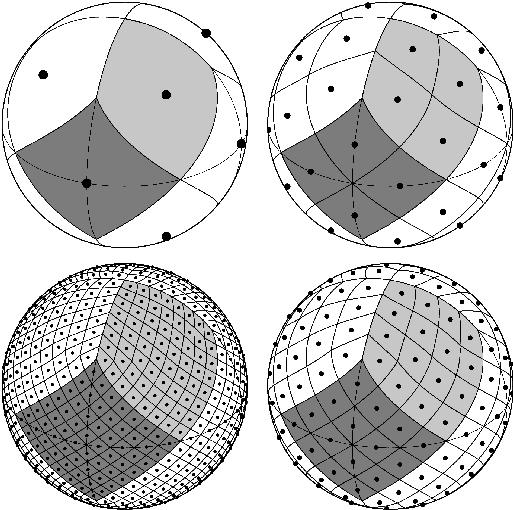

First, let's create the instance of Nut using the SSP, time parameters and the level of discretization for the sky. This last part is done setting the nside parameter, which must be a power of 2 and will be used by HEALPix.

In [1]:
from nutpy.mission import Nut

In [2]:
alpha = 45
beta = 50
Tspin = 10
Tprec = 90

delta_instrument = 7.5

Tsim = 5*3600  # [s]

dT = 0.1  # [s]

nside = 32

SSP = [alpha, beta, Tspin, Tprec]

LB = Nut(SSP=SSP, delta_instrument=delta_instrument, Tsim=Tsim, dT=dT, nside=nside)

Then, the numerical analysis must be performed. This task can be time consuming if the time period is long, the time step is low, or nside is high.

In [3]:
LB.numerical_analysis()

  0%|          | 0/12288 [00:00<?, ?it/s]

0

Once the numerical analysis is performed, the results can be plotted.

mollweide
mollweide
mollweide


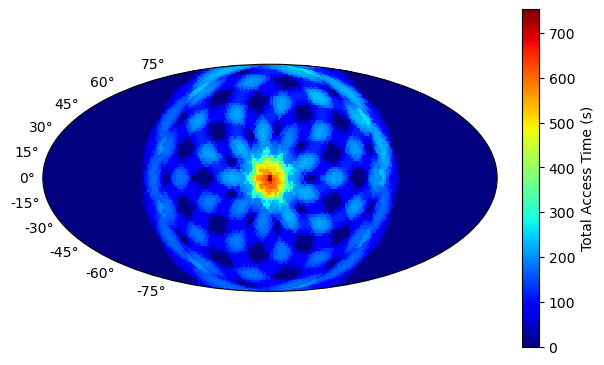

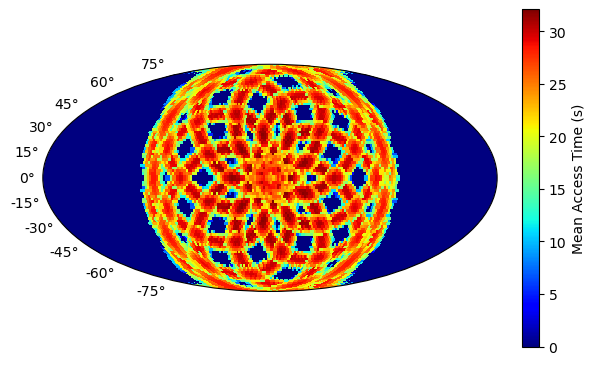

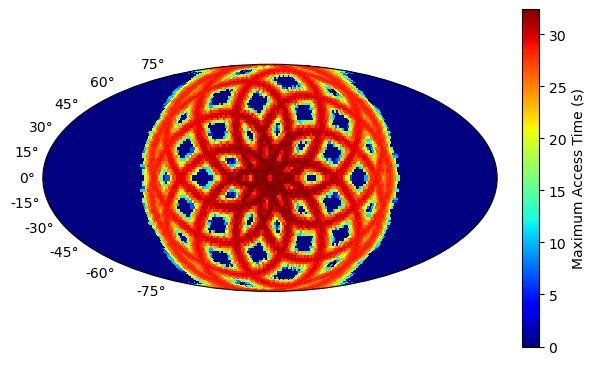

In [4]:
fig_tat_eye, data_tat_eye = LB.numerical_map(quantity="TAT")
fig_mat_eye, data_mat_eye = LB.numerical_map(quantity="MAT")
fig_max_eye, data_max_eye = LB.numerical_map(quantity="MAX")

It's also possible to get the results in a table. Each row represents a particular element of the grid (called pixel in HEALPix). The quantity NOA represents the number of accesses and it is used internally to compute the mean access time from the total access time.

In [5]:
LB.numerical_results_df

TAT  NOA        MAT        MAX
0      195.199997    8  24.406250  28.796875
1      214.000000    8  26.750000  27.593750
2      218.399994    8  27.296875  28.203125
3      199.600006    8  24.953125  28.796875
4      204.000000   12  17.000000  28.406250
...           ...  ...        ...        ...
12283  119.099998    6  19.843750  27.796875
12284  146.399994    6  24.406250  28.796875
12285  160.500000    6  26.750000  27.593750
12286  163.800003    6  27.296875  28.203125
12287  149.699997    6  24.953125  28.796875

[12288 rows x 4 columns]

There is more information avaiable inside Nut, for example, the satellite and the instrument attitude expressed in quaternions. This information is not intended to be used by the user but it can be retrieved.

In [6]:
# satellite attitude
LB._sat.attitude_df.head(10)

q1        q2        q3        q4
0.0  0.000000  0.000000  0.382683  0.923880
0.1  0.000537  0.000178  0.382683  0.923879
0.2  0.001075  0.000356  0.382683  0.923879
0.3  0.001612  0.000534  0.382683  0.923878
0.4  0.002150  0.000712  0.382683  0.923877
0.5  0.002687  0.000891  0.382682  0.923876
0.6  0.003225  0.001069  0.382682  0.923874
0.7  0.003762  0.001247  0.382681  0.923872
0.8  0.004300  0.001425  0.382681  0.923870
0.9  0.004837  0.001603  0.382680  0.923867

In [7]:
# instrument attitude
LB._sat.instrument_attitude_df.head(10)

q1        q2        q3        q4
0.0  0.000000  0.000000  0.737277  0.675590
0.1  0.000562 -0.000066  0.737277  0.675590
0.2  0.001125 -0.000131  0.737277  0.675590
0.3  0.001687 -0.000197  0.737276  0.675589
0.4  0.002250 -0.000263  0.737276  0.675588
0.5  0.002812 -0.000329  0.737275  0.675587
0.6  0.003374 -0.000394  0.737274  0.675586
0.7  0.003937 -0.000460  0.737272  0.675584
0.8  0.004499 -0.000526  0.737271  0.675582
0.9  0.005062 -0.000592  0.737269  0.675580